In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

In [ ]:

# Generating synthetic data
n_samples = 10
x = np.array([0, 0.095, 0.18, 0.3, 0.45, 0.55, 0.64, 0.71, 0.89, 1])
y = np.sin(2 * np.pi * x) + np.random.randn(n_samples) * 0.1

# Generate test data
x_test = np.linspace(0, 1, 100)
y_test = np.sin(2 * np.pi * x_test)

In [ ]:

# Different polynomial degrees and regularization parameters
degrees = [9, 9, 9]
lambdas = [0, np.exp(-18), np.exp(0)]
titles = ["M=9", "ln λ = -18", "ln λ = 0"]


In [ ]:

# Plot settings for model predictions
plt.figure(figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.scatter(x, y, edgecolor='b', s=50, facecolor='none', label="Training points")

    # Polynomial regression with Ridge regularization
    poly = PolynomialFeatures(degree=degrees[i])
    model = make_pipeline(poly, Ridge(alpha=lambdas[i]))
    model.fit(x[:, np.newaxis], y)

    # Generate prediction
    y_pred = model.predict(x_test[:, np.newaxis])

    # Plot the data
    plt.plot(x_test, np.sin(2 * np.pi * x_test), color='green', label="True function")
    plt.plot(x_test, y_pred, color='red', label="Model prediction")
    plt.xlabel("x")
    plt.ylabel("t")
    plt.title(titles[i])
    plt.legend()
    plt.grid(True)

plt.show()

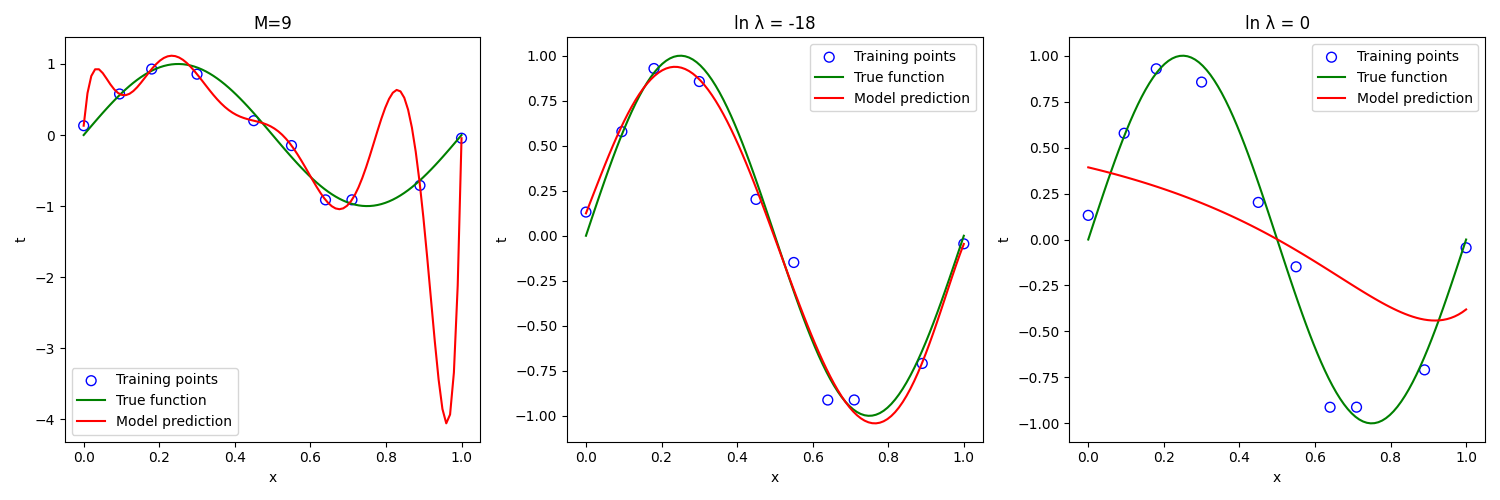

In [ ]:

# Plot settings for errors
lambda_values = np.linspace(-40, 0, 400)
train_errors = []
test_errors = []

for log_lambda in lambda_values:
    alpha = np.exp(log_lambda)
    model = make_pipeline(PolynomialFeatures(degree=9), Ridge(alpha=alpha))
    model.fit(x[:, np.newaxis], y)
    
    y_train_pred = model.predict(x[:, np.newaxis])
    y_test_pred = model.predict(x_test[:, np.newaxis])
    
    train_errors.append(mean_squared_error(y, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

plt.figure()
plt.plot(lambda_values, train_errors, label="Training", color='blue')
plt.plot(lambda_values, test_errors, label="Test", color='red')
plt.xlabel("ln λ")
plt.ylabel("E_RMS")
plt.legend()
plt.grid(True)
plt.show()

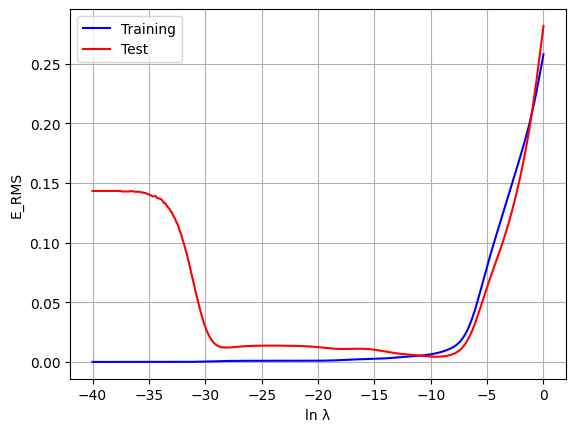